In [873]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [874]:
import pandas as pd #numerical analysis library
import numpy as np #data analysis library
import matplotlib.pyplot as plt #Visualization library
import seaborn as sns #visualization library

In [875]:
data = pd.read_csv("day.csv")

In [876]:
# Check the head of the dataset
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Unnamed: 16,Unnamed: 17
0,1,1/1/2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,NaN,NaN
1,2,2/1/2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,NaN,NaN
2,3,3/1/2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,NaN,NaN
3,4,4/1/2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,NaN,NaN
4,5,5/1/2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,NaN,NaN


Inspect the various aspects of the data dataframe

In [877]:
data.shape
#importing dataset through pandas library

(730, 18)

In [878]:
data.info()
#This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   instant      730 non-null    int64  
 1   dteday       730 non-null    object 
 2   season       730 non-null    int64  
 3   yr           730 non-null    int64  
 4   mnth         730 non-null    int64  
 5   holiday      730 non-null    int64  
 6   weekday      730 non-null    int64  
 7   workingday   730 non-null    int64  
 8   weathersit   730 non-null    int64  
 9   temp         730 non-null    float64
 10  atemp        730 non-null    float64
 11  hum          730 non-null    float64
 12  windspeed    730 non-null    float64
 13  casual       730 non-null    int64  
 14  registered   730 non-null    int64  
 15  cnt          730 non-null    int64  
 16  Unnamed: 16  0 non-null      float64
 17  Unnamed: 17  0 non-null      float64
dtypes: float64(6), int64(11), object(1)
memory usage: 

In [879]:
first_column = data.pop('cnt')#putting the dependent or target variable in another variable
data.insert(0, 'cnt', first_column)#inserting the new column in new dataset
data=data.drop(['casual','registered','instant','mnth','weekday'],axis=1)#dropping all the columns based on domain knowledge, irrelavant on basis on problem statement & data dictionary

In [880]:
data.describe()
#calculating some statistical data like percentile, mean and std of the numerical values of the data

,cnt,season,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,Unnamed: 16,Unnamed: 17
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,0.0,0.0
mean,4508.006849,2.498630,0.500000,0.028767,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,NaN,NaN
std,1936.011647,1.110184,0.500343,0.167266,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,NaN,NaN
min,22.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,NaN,NaN
25%,3169.750000,2.000000,0.000000,0.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,NaN,NaN
50%,4548.500000,3.000000,0.500000,0.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,NaN,NaN
75%,5966.000000,3.000000,1.000000,0.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,NaN,NaN
max,8714.000000,4.000000,1.000000,1.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,NaN,NaN


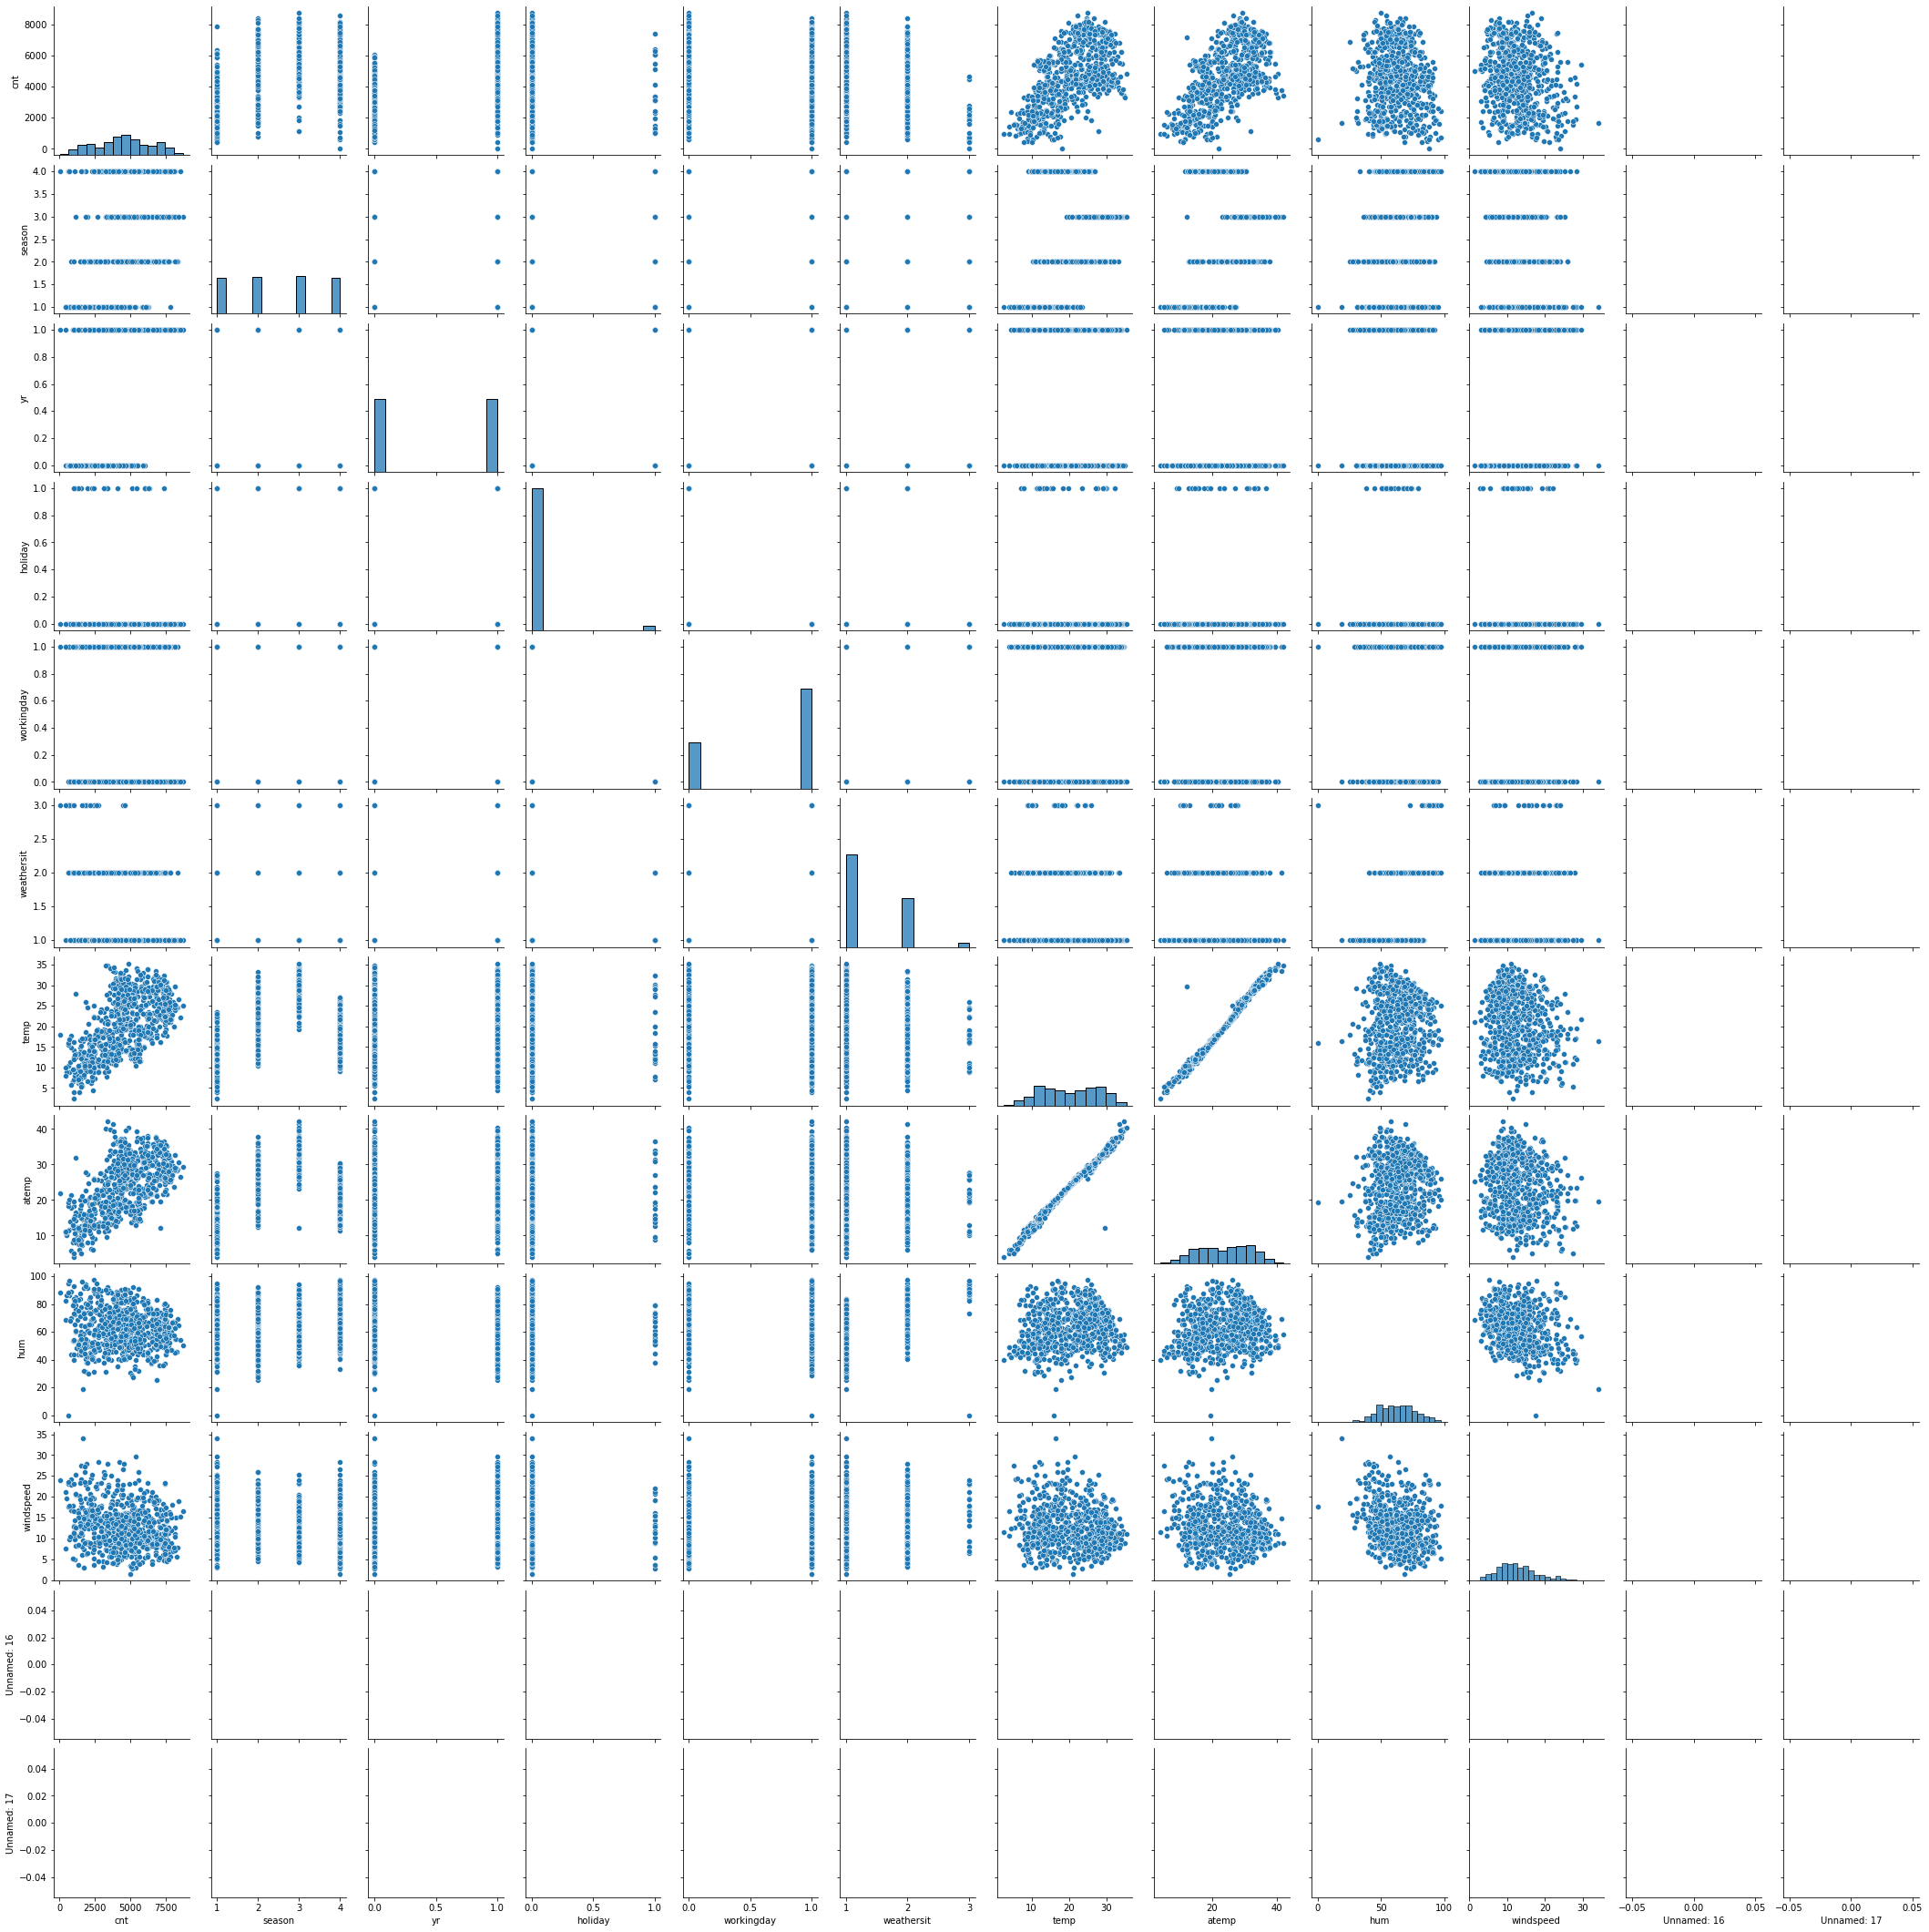

In [881]:
sns.pairplot(data)#pairplot command
plt.show()
#ploting multiple scatterplot for continous variable to understand there relevance relative to target variable

In [882]:
cat_col=['season','yr','holiday','workingday','weathersit']#segrating categorical driver from dataframe for plotting purpose
cont_col=['temp','atemp','hum','windspeed']

season_dict = {1:'spring', 2:'summer', 3:'fall', 4:'winter'}#creating season a dictionary to replace 0 or 1 with corresponding categorical value
yr_dict={0:'2018',1:'2019'}#creating yr a dictionary to replace 0 or 1 with corresponding categorical value
holiday_dict={0:'Non-Holiday',1:'Holiday'}#creating holiday a dictionary to replace 0 or 1 with corresponding categorical value
workingday_dict={0:"Non-Working",1:'Working'}#creating working a dictionary to replace 0 or 1 with corresponding categorical value
weathersit_dict={1:'Clear or No Cloud',2:'Mist Cloud',3:'Light Snow or Rain',4:'Heavy Rain or Snow'}#creating a working dictionary to replace 0 or 1 with corresponding categorical value
data1=pd.DataFrame()#creating a new dataframe & adding all the above categorical values into this
data1['season']=data['season'].replace(season_dict)
data1['holiday']=data['holiday'].replace(holiday_dict)
data1['yr']=data['yr'].replace(yr_dict)
data1['workingday']=data['workingday'].replace(workingday_dict)
data1['weathersit']=data['weathersit'].replace(weathersit_dict)


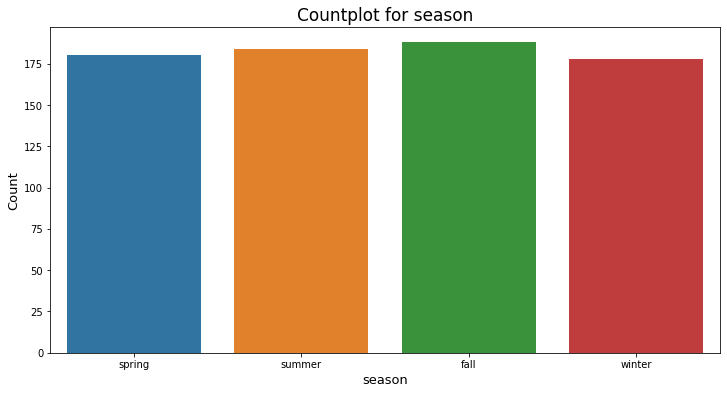

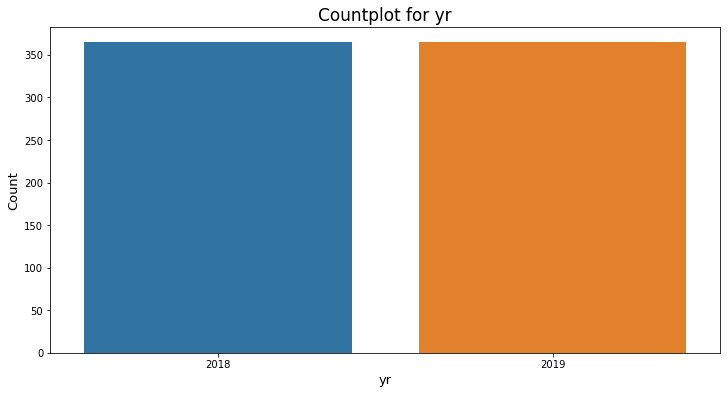

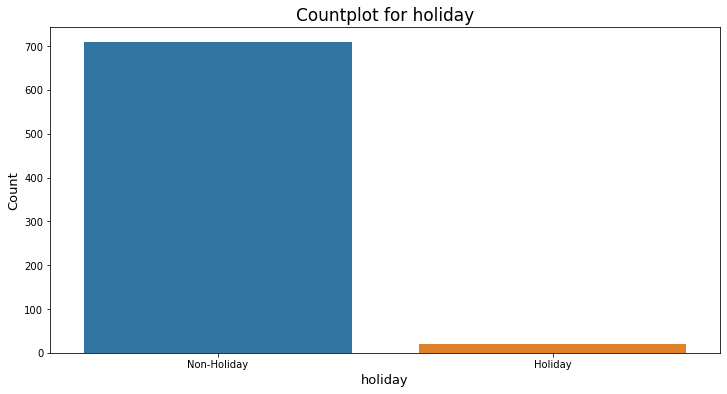

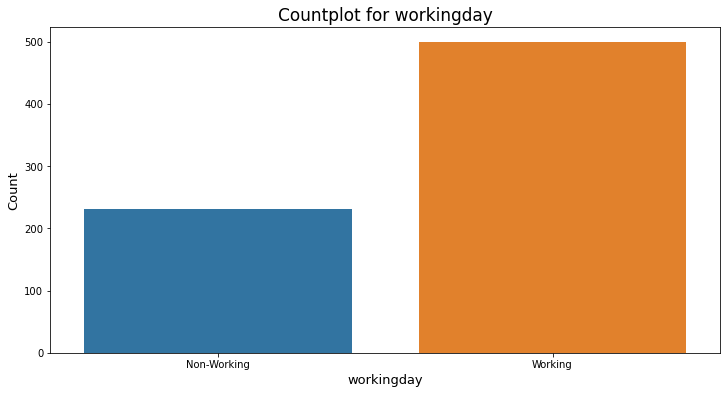

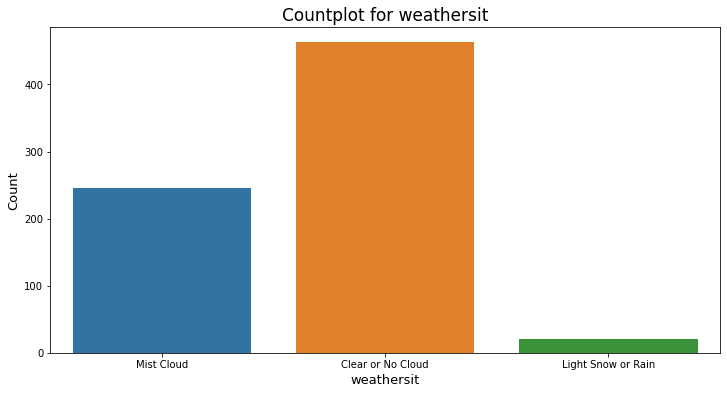

In [883]:


for i in cat_col:
    plt.figure(figsize=(12,6))#fixing the figure size of the plot
    sns.countplot(data1[i])#running command for multiple count plot for categorical variable
    plt.title("Countplot for "+i,size=17) #setting the title for each count plot
    plt.xlabel(i,fontsize=13)#fixing the label size of x axis driver
    plt.ylabel('Count',fontsize=13)##fixing the label size of y axis Count
    plt.show()

#plotting multiplecount plots for categorical variables to understand their relevance & get meaningful insights

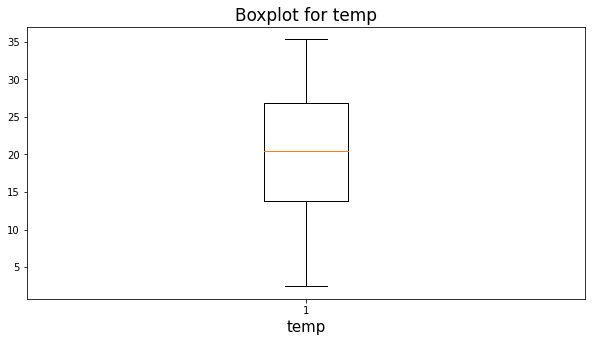

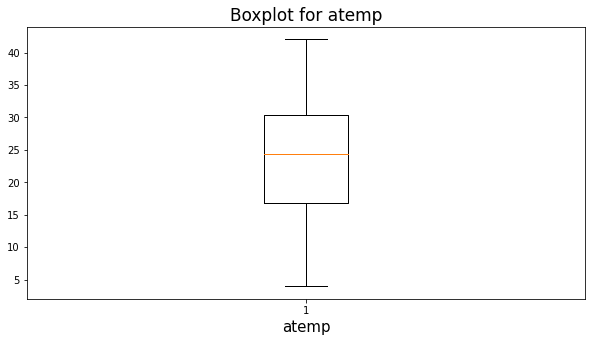

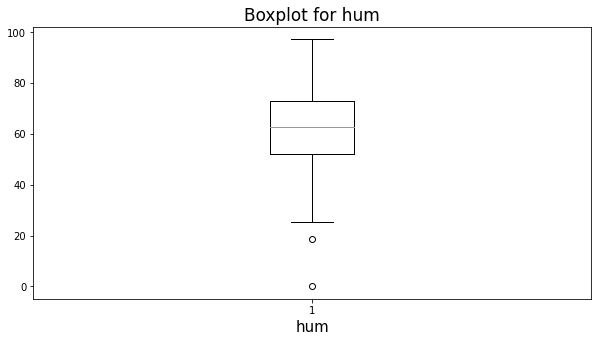

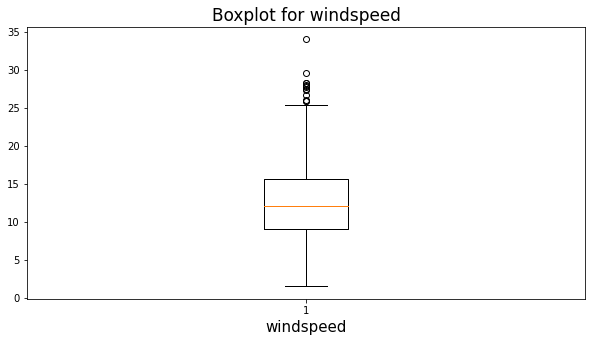

In [884]:
for i in cont_col:
    plt.figure(figsize=(10,5))#fixing the figure size of the plot
    plt.boxplot(data[i])#running command for multiple box plot for categorical variable
    plt.title("Boxplot for "+i,size=17) #setting the title for each box plot
    plt.xlabel(i,fontsize=15)#fixing the label size of x axis driver
    plt.show()

#ploting multiple boxplots for continous drivers to have an understanding of outliers 

In [885]:
# Get the dummy variables for the feature season & weathersit and store it in a new variable - 'status' & 'status1'
status = pd.get_dummies(data1['season'])
status1 = pd.get_dummies(data1['weathersit'])

In [886]:
# Let's drop the first column from status df using 'drop_first = True'

status = pd.get_dummies(data1['season'], drop_first = True)
status1 = pd.get_dummies(data1['weathersit'], drop_first = True)

In [887]:
# Add the results to the original data dataframe

data = pd.concat([data, status], axis = 1)
data = pd.concat([data, status1], axis = 1)

In [888]:
#the head of our dataframe.
data=data.drop(["Unnamed: 16","Unnamed: 17"],axis=1)
data.head()

,cnt,dteday,season,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,spring,summer,winter,Light Snow or Rain,Mist Cloud
0,985,1/1/2018,1,0,0,0,2,14.110847,18.18125,80.5833,10.749882,1,0,0,0,1
1,801,2/1/2018,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,1,0,0,0,1
2,1349,3/1/2018,1,0,0,1,1,8.050924,9.47025,43.7273,16.636703,1,0,0,0,0
3,1562,4/1/2018,1,0,0,1,1,8.200000,10.60610,59.0435,10.739832,1,0,0,0,0
4,1600,5/1/2018,1,0,0,1,1,9.305237,11.46350,43.6957,12.522300,1,0,0,0,0


In [889]:
# Drop season & weatherit as we have created the dummies for it & holiday as we already have working day which tell 0 as weekend or holiday
data=data.drop(['weathersit','season','dteday'],axis=1)#dropping all the columns based on domain knowledge, irrelavant on basis on problem statement & data dictionary

In [890]:
data.head()

,cnt,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,Light Snow or Rain,Mist Cloud
0,985,0,0,0,14.110847,18.18125,80.5833,10.749882,1,0,0,0,1
1,801,0,0,0,14.902598,17.68695,69.6087,16.652113,1,0,0,0,1
2,1349,0,0,1,8.050924,9.47025,43.7273,16.636703,1,0,0,0,0
3,1562,0,0,1,8.200000,10.60610,59.0435,10.739832,1,0,0,0,0
4,1600,0,0,1,9.305237,11.46350,43.6957,12.522300,1,0,0,0,0


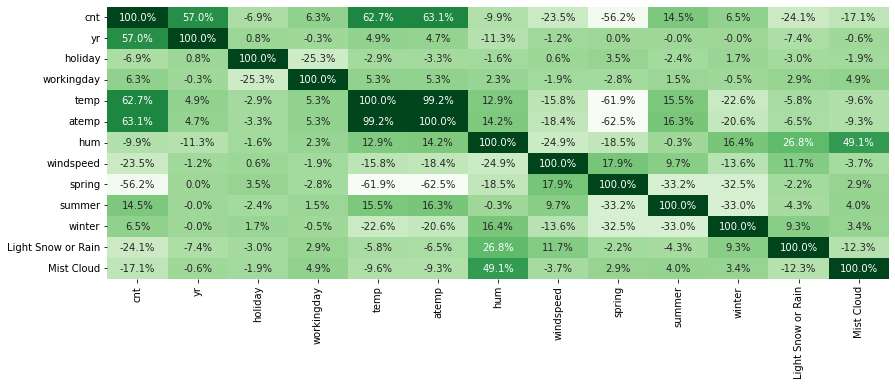

In [891]:
plt.figure(figsize = (14,5)) #fixing the figure size of the plot
sns.heatmap(data.corr(),annot=True,cmap='Greens',fmt='.1%',cbar=False)#running command for heatmap for correlation of continous variable
plt.show()
#correlation matrix formed through heatmap to understand the correlation of continous variables & there relevance

In [892]:
data=data.drop(['atemp'],axis=1)#dropping atemp as it has a high correlation with temp & atemp is a feeling temperature which will be less accurate than temp

In [893]:
from sklearn.model_selection import train_test_split #importing relevant libraries for model building

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [894]:
from sklearn.preprocessing import MinMaxScaler #importing relevant libraries for scaling the model
scaler = MinMaxScaler() #adding the scaling method in a variable


In [895]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [896]:
df_train.head()

,cnt,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,Light Snow or Rain,Mist Cloud
653,0.864243,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,0
576,0.827658,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,0
426,0.465255,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,1
728,0.204096,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,0
482,0.482973,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,1


In [897]:
df_train.describe()

,cnt,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,Light Snow or Rain,Mist Cloud
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000
mean,0.513620,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.243137,0.245098,0.24902,0.029412,0.343137
std,0.224593,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.429398,0.430568,0.43287,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.356420,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.000000,0.000000,0.00000,0.000000,0.000000
50%,0.518638,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.000000,0.000000,0.00000,0.000000,0.000000
75%,0.684710,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.000000,0.000000,0.00000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


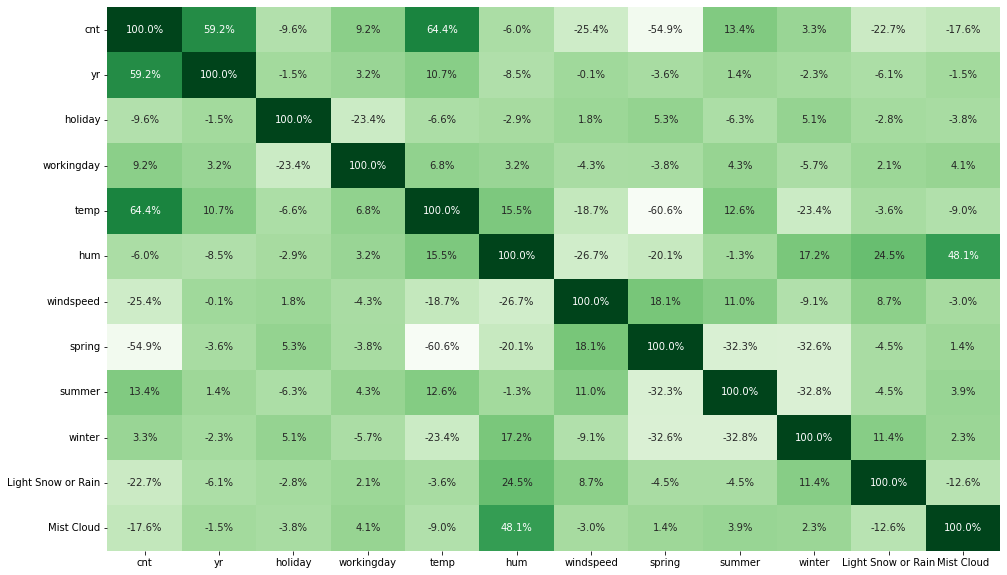

In [898]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(),annot=True,cmap='Greens',fmt='.1%',cbar=False )
plt.show()

In [899]:
# Dividing into X and Y sets for the model building
y_train = df_train.pop('cnt')
X_train = df_train

In [900]:
from sklearn.feature_selection import RFE #importing relevant libraries to use recursive feature elimination
from sklearn.linear_model import LinearRegression #importing relevant libraries for Linear Regression modelling

In [901]:
# Running RFE with the output number of the variable equal to 8
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, step=8)    # running RFE
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))#checking the list with the top drivers & proceeding ahead with that

[('yr', True, 1),
 ('holiday', False, 2),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', False, 2),
 ('summer', False, 2),
 ('winter', False, 2),
 ('Light Snow or Rain', True, 1),
 ('Mist Cloud', False, 2)]

In [902]:
import statsmodels.api as sm

# Add a constant or intercept & selecting temp as first feature or driver it has the highest correlation with dependent variable
X_train_lm = sm.add_constant(X_train[['temp']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [903]:
# Checking the parameters obtained
lr.params

const    0.169798
temp     0.639952
dtype: float64

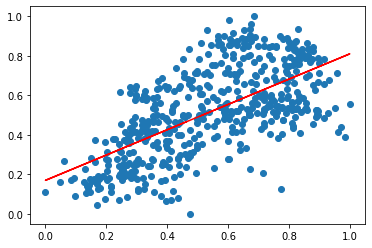

In [904]:
# visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.169798 +0.639952*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [905]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Fri, 05 Aug 2022   Prob (F-statistic):           5.80e-61
Time:                        00:40:44   Log-Likelihood:                 174.84
No. Observations:                 510   AIC:                            -345.7
Df Residuals:                     508   BIC:                            -337.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1698      0.020      8.628      0.0

In [906]:
# Assigning additional feature variables to X
X_train_lm = X_train[['windspeed', 'yr','temp']]

In [907]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const        0.157022
windspeed   -0.196438
yr           0.238494
temp         0.555578
dtype: float64

In [908]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     416.0
Date:                Fri, 05 Aug 2022   Prob (F-statistic):          3.84e-136
Time:                        00:40:45   Log-Likelihood:                 355.52
No. Observations:                 510   AIC:                            -703.0
Df Residuals:                     506   BIC:                            -686.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1570      0.019      8.177      0.0

In [909]:
# Assigning additional feature variables to X
X_train_lm = X_train[['Light Snow or Rain','yr','windspeed','temp']]

In [910]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const                 0.160981
Light Snow or Rain   -0.216594
yr                    0.234163
windspeed            -0.178269
temp                  0.553313
dtype: float64

In [911]:
# Print the summary of the model
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     355.3
Date:                Fri, 05 Aug 2022   Prob (F-statistic):          2.90e-145
Time:                        00:40:45   Log-Likelihood:                 379.90
No. Observations:                 510   AIC:                            -749.8
Df Residuals:                     505   BIC:                            -728.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1610      0

Looking at the p-values in the above result we have it looks like the variables are really significant
And also our adjusted R2 has increase from 41% to 73%

In [912]:
# Assigning additional feature variables to X on the basis of the REF & above correlation matrix 
X_train_lm_1 = X_train[['Light Snow or Rain','yr','windspeed','temp','Mist Cloud','spring']]


In [913]:
# Build a linear model with new features

import statsmodels.api as sm
X_train_lm_1 = sm.add_constant(X_train_lm_1)
lr1 = sm.OLS(y_train, X_train_lm_1).fit()
lr1.params


const                 0.320383
Light Snow or Rain   -0.271313
yr                    0.236372
windspeed            -0.157135
temp                  0.362729
Mist Cloud           -0.075476
spring               -0.153830
dtype: float64

In [914]:
# Print the summary of the model

print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     362.5
Date:                Fri, 05 Aug 2022   Prob (F-statistic):          4.81e-179
Time:                        00:40:46   Log-Likelihood:                 464.91
No. Observations:                 510   AIC:                            -915.8
Df Residuals:                     503   BIC:                            -886.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3204      0

Looking at the p-values in the above result we have it looks like of the variables are really significant
And also our adjusted R2 has increase from 73% to 81%

In [915]:
# Assigning additional feature variables to X on the basis of the REF & above correlation matrix 
X_train_lm_2 = X_train[['Light Snow or Rain','yr','windspeed','temp','spring','Mist Cloud','winter','summer','workingday','holiday']]

In [916]:
# Build a linear model with new features

import statsmodels.api as sm
X_train_lm_2 = sm.add_constant(X_train_lm_2)

lr2 = sm.OLS(y_train, X_train_lm_2).fit()

lr2.params

const                 0.210114
Light Snow or Rain   -0.280974
yr                    0.233580
windspeed            -0.152751
temp                  0.465688
spring               -0.082096
Mist Cloud           -0.077021
winter                0.076905
summer                0.036963
workingday            0.017828
holiday              -0.075825
dtype: float64

In [917]:
# Print the summary of the model
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     233.8
Date:                Fri, 05 Aug 2022   Prob (F-statistic):          3.79e-181
Time:                        00:40:47   Log-Likelihood:                 481.67
No. Observations:                 510   AIC:                            -941.3
Df Residuals:                     499   BIC:                            -894.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2101      0

Looking at the p-values in the above result we have it looks like the variables are really significant apart from working day as it has p value higher than 0.5
But our adjusted R2 has stopped improving it means we will stick to our previous model driver or feature in X_train_lm_1  that are ['Light Snow or Rain','yr','windspeed','temp','Mist Cloud','spring']

Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [918]:
y_train_cnt = lr1.predict(X_train_lm_1)

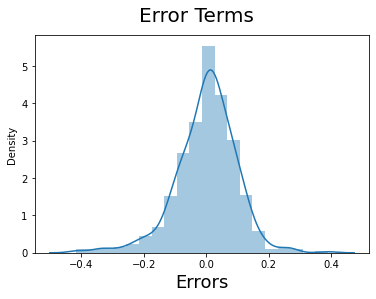

In [919]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

As we can see in the above figure our model residual is perfectly aligned at mean=0 which show its an acceptable model

In [920]:
#Making Predictions Using the Final Model
num_vars = ['temp','hum','windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

In [921]:
df_test.head()

,cnt,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,Light Snow or Rain,Mist Cloud
184,0.692706,0,1,0,0.831783,0.657364,0.084219,0,0,0,0,1
535,0.712034,1,0,1,0.901354,0.610133,0.153728,0,1,0,0,0
299,0.303382,0,0,1,0.511964,0.837699,0.334206,0,0,1,0,1
221,0.547400,0,0,1,0.881625,0.437098,0.339570,0,0,0,0,0
152,0.569029,0,0,1,0.817246,0.314298,0.537414,0,1,0,0,0


In [922]:
# Dividing df_test set into X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [923]:
# Adding constant variable to test dataframe
X_test_1 = sm.add_constant(X_test)

In [924]:
# Creating X_test_m2 dataframe by dropping variables from X_test_m1

X_test_m2 = X_test_1.drop(["hum", "workingday", "holiday",'summer','winter'], axis = 1)
X_test_m2

,const,yr,temp,windspeed,spring,Light Snow or Rain,Mist Cloud
184,1.0,0,0.831783,0.084219,0,0,1
535,1.0,1,0.901354,0.153728,0,0,0
299,1.0,0,0.511964,0.334206,0,0,1
221,1.0,0,0.881625,0.339570,0,0,0
152,1.0,0,0.817246,0.537414,0,0,0
...,...,...,...,...,...,...,...
400,1.0,1,0.257562,0.287411,1,0,1
702,1.0,1,0.519232,0.283397,0,0,0
127,1.0,0,0.584649,0.069510,0,0,0
640,1.0,1,0.745598,0.052115,0,0,1


In [925]:
# Making predictions using the lr1 which has model feature in X_train_lm_1  that are ['Light Snow or Rain','yr','windspeed','temp','Mist Cloud','spring']
from sklearn.metrics import r2_score
y_pred_m2 = lr1.predict(X_test_m2)
r2_score(y_true=y_test,y_pred=y_pred_m2)

-2.6673938717389913

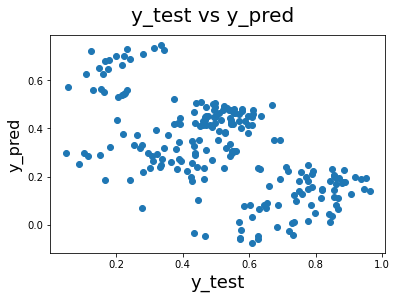

In [926]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m2)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  
plt.show()    